<h1>Yelp - regression project </h1>
We will be working with six files provided by Yelp:
* `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: user profile metadata by business
* `yelp_checkin.json`: online checkin metadata by business
* `yelp_tip.json`: tip metadata by business
* `yelp_photo.json`: photo metadata by busines

# Imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 14
#sns.set(rc={ 'axes.facecolor':'white', 'figure.facecolor':'white' ,'legend.frameon': False})

## Load data

### Load .json data into DataFrame using pandas:

* `yelp_business.json`: load to DataFrame named bussines 
* `yelp_review.json`:  load to DataFrame named review
* `yelp_user.json`: load to DataFrame named  users
* `yelp_checkin.json`: load to DataFrame named checkin
* `yelp_tip.json`: load to DataFrame named tip
* `yelp_photo.json`: load to DataFrame named photo

In [3]:
json_names = ['yelp_business', 'yelp_review', 'yelp_user', 'yelp_checkin', 'yelp_tip', '' ]

In [4]:
bussiness = pd.read_json('yelp_business.json',lines=True)
review  = pd.read_json('yelp_review.json',lines=True)
user = pd.read_json('yelp_user.json',lines=True)
checkin = pd.read_json('yelp_checkin.json',lines=True)
tip = pd.read_json('yelp_tip.json',lines=True)
photo = pd.read_json('yelp_photo.json',lines=True)

In [5]:
#bussiness.to_csv('business.csv')
#review.to_csv('review.csv')#
#user.to_csv('user.csv')
#checkin.to_csv('checkin.csv')
#tip.to_csv('data/.csv')
#photo.to_csv('data/photo.csv')

### Analysis of dataframes

In [6]:
print(bussiness.columns)

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards'],
      dtype='object')


In [7]:
def info_df(dataframe, head=5):
    print('SHAPE'.center(48, '#'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print('Types'.center(48, '#'))
    print(dataframe.dtypes)
    print('Head'.center(48, '#'))
    print(dataframe.head(head))
    print('Tail'.center(48, '#'))
    print(dataframe.tail(head))
    print('Missing Values'.center(48, '#'))
    print(dataframe.isnull().sum())

In [8]:
info_df(bussiness)

#####################SHAPE######################
Rows: 188593
Columns: 22
#####################Types######################
address                object
alcohol?                int64
attributes             object
business_id            object
categories             object
city                   object
good_for_kids           int64
has_bike_parking        int64
has_wifi                int64
hours                  object
is_open                 int64
latitude              float64
longitude             float64
name                   object
neighborhood           object
postal_code            object
price_range             int64
review_count            int64
stars                 float64
state                  object
take_reservations       int64
takes_credit_cards      int64
dtype: object
######################Head######################
               address  alcohol?  \
0    1314 44 Avenue NE         0   
1                              0   
2  1335 rue Beaubien E         1   
3      211

### Describe

In [10]:
bussiness.describe()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,is_open,latitude,longitude,price_range,review_count,stars,take_reservations,takes_credit_cards
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000,188587.000000,188587.000000,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,0.140610,0.279029,0.350692,0.134968,0.830391,38.506793,-97.490873,1.035855,31.797310,3.631550,0.106086,0.700243
std,0.347619,0.448523,0.477188,0.341690,0.375290,5.122684,17.693360,1.037985,104.124212,1.016783,0.307948,0.458152
min,0.000000,0.000000,0.000000,0.000000,0.000000,-71.753941,-180.000000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,33.630878,-112.279276,0.000000,4.000000,3.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,36.143595,-111.777460,1.000000,9.000000,3.500000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,43.593106,-79.982958,2.000000,24.000000,4.500000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,85.051129,115.086769,4.000000,7968.000000,5.000000,1.000000,1.000000


In [11]:
def print_data(dataframe):
    print('The length of  is {}.'.format( len(dataframe)))
    print('\n The columns in dataframe are:')
    for column in dataframe.columns:
        print(f"        -{column}")

print_data(bussiness)

The length of  is 188593.

 The columns in dataframe are:
        -address
        -alcohol?
        -attributes
        -business_id
        -categories
        -city
        -good_for_kids
        -has_bike_parking
        -has_wifi
        -hours
        -is_open
        -latitude
        -longitude
        -name
        -neighborhood
        -postal_code
        -price_range
        -review_count
        -stars
        -state
        -take_reservations
        -takes_credit_cards


In [12]:
print_data(review)

The length of  is 188593.

 The columns in dataframe are:
        -business_id
        -average_review_age
        -average_review_length
        -average_review_sentiment
        -number_funny_votes
        -number_cool_votes
        -number_useful_votes


In [13]:
print_data(checkin)

The length of  is 157075.

 The columns in dataframe are:
        -business_id
        -time
        -weekday_checkins
        -weekend_checkins


In [14]:
print_data(tip)

The length of  is 121526.

 The columns in dataframe are:
        -business_id
        -average_tip_length
        -number_tips


In [15]:
print_data(photo)

The length of  is 32976.

 The columns in dataframe are:
        -business_id
        -average_caption_length
        -number_pics


### All dataframes have the column business_id in common. Based on this column we can merge each dataframe to one. 

## Merging data

In [16]:
print(len(bussiness))
print(len(review))

188593
188593


In [17]:
df = pd.merge(bussiness, review, how='left', on='business_id')
print_data(df)

The length of  is 188593.

 The columns in dataframe are:
        -address
        -alcohol?
        -attributes
        -business_id
        -categories
        -city
        -good_for_kids
        -has_bike_parking
        -has_wifi
        -hours
        -is_open
        -latitude
        -longitude
        -name
        -neighborhood
        -postal_code
        -price_range
        -review_count
        -stars
        -state
        -take_reservations
        -takes_credit_cards
        -average_review_age
        -average_review_length
        -average_review_sentiment
        -number_funny_votes
        -number_cool_votes
        -number_useful_votes


In [18]:
df = pd.merge(df, user, how='left', on='business_id')
df = pd.merge(df, checkin, how='left', on='business_id')
df = pd.merge(df, tip, how='left', on='business_id')
df = pd.merge(df, photo, how='left', on='business_id')

print_data(df)

The length of  is 188593.

 The columns in dataframe are:
        -address
        -alcohol?
        -attributes
        -business_id
        -categories
        -city
        -good_for_kids
        -has_bike_parking
        -has_wifi
        -hours
        -is_open
        -latitude
        -longitude
        -name
        -neighborhood
        -postal_code
        -price_range
        -review_count
        -stars
        -state
        -take_reservations
        -takes_credit_cards
        -average_review_age
        -average_review_length
        -average_review_sentiment
        -number_funny_votes
        -number_cool_votes
        -number_useful_votes
        -average_number_friends
        -average_days_on_yelp
        -average_number_fans
        -average_review_count
        -average_number_years_elite
        -time
        -weekday_checkins
        -weekend_checkins
        -average_tip_length
        -number_tips
        -average_caption_length
        -number_pics


## Clean data

### Droping unnecessary columns

We need to remove any columns that are not continous or binary - cannot make predictions on that. 

In [19]:
print(df.categories[0])

Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel


In [20]:
columns_to_remove = ['address', 'attributes', 'business_id','categories', 'city', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'state', 'time']

In [21]:
print(len(df.columns))
df.drop(columns_to_remove, axis=1, inplace=True)
print(len(df.columns))

40
26


In [22]:
info_df(df)

#####################SHAPE######################
Rows: 188593
Columns: 26
#####################Types######################
alcohol?                        int64
good_for_kids                   int64
has_bike_parking                int64
has_wifi                        int64
price_range                     int64
review_count                    int64
stars                         float64
take_reservations               int64
takes_credit_cards              int64
average_review_age            float64
average_review_length         float64
average_review_sentiment      float64
number_funny_votes              int64
number_cool_votes               int64
number_useful_votes             int64
average_number_friends        float64
average_days_on_yelp          float64
average_number_fans           float64
average_review_count          float64
average_number_years_elite    float64
weekday_checkins              float64
weekend_checkins              float64
average_tip_length            float64
num

In [23]:
df_nan = df.isna().any()
df_nan = df_nan[df_nan == True]
dict_cols_nan = {key: 0 for key in df_nan.index}
#print(dict_cols_nan)
df.fillna(dict_cols_nan, inplace=True)
#print(df.isna().any())

In [24]:
#df.to_csv('merged.csv')

## Eploratory analysis

Now that our data is all together, let's investigate some of the different features to see what might correlate most with our dependent variable, the Yelp rating (called stars in our DataFrame). The features with the best correlations could prove to be the most helpful for our Linear Regression model! Pandas DataFrames have a really helpful method, .corr(), that allows us to see the correlation coefficients for each pair of our different features. Remember, a correlation of 0 indicates that two features have no linear relationship, a correlation coefficient of 1 indicates two features have a perfect positive linear relationship, and a correlation coefficient of -1 indicates two features have a perfect negative linear relationship. Call .corr() on df. You'll see that number_funny_votes has a correlation coefficient of 0.001320 with respect to stars, our Yelp rating. This is a very weak correlation. What features best correlate, both positively and negatively, with Yelp rating?

In [25]:
corr = df.corr()
print(corr)

                            alcohol?  good_for_kids  has_bike_parking  \
alcohol?                    1.000000       0.305284          0.213318   
good_for_kids               0.305284       1.000000          0.271788   
has_bike_parking            0.213318       0.271788          1.000000   
has_wifi                    0.345032       0.258887          0.235138   
price_range                 0.349004       0.205513          0.416044   
review_count                0.259836       0.162469          0.155505   
stars                      -0.043332      -0.030382          0.068084   
take_reservations           0.601670       0.318729          0.160129   
takes_credit_cards          0.190738       0.150360          0.286298   
average_review_age          0.139108       0.055847         -0.080443   
average_review_length       0.037369      -0.079183         -0.116295   
average_review_sentiment    0.097188       0.073806          0.130448   
number_funny_votes          0.117472       0.060658

In [26]:
cor_stars = corr.stars.drop(labels=['stars']).reset_index()

print(cor_stars)

                         index     stars
0                     alcohol? -0.043332
1                good_for_kids -0.030382
2             has_bike_parking  0.068084
3                     has_wifi -0.039857
4                  price_range -0.052565
5                 review_count  0.032413
6            take_reservations -0.024486
7           takes_credit_cards  0.037748
8           average_review_age -0.125645
9        average_review_length -0.277081
10    average_review_sentiment  0.782187
11          number_funny_votes  0.001320
12           number_cool_votes  0.043375
13         number_useful_votes -0.000066
14      average_number_friends -0.007629
15        average_days_on_yelp -0.038061
16         average_number_fans -0.031141
17        average_review_count -0.066572
18  average_number_years_elite -0.064419
19            weekday_checkins  0.004130
20            weekend_checkins  0.007863
21          average_tip_length -0.052899
22                 number_tips  0.014038
23      average_

C:\Users\Admin\AppData\Local\Temp\ipykernel_6980\1636339016.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cor_stars['index'], rotation=30)


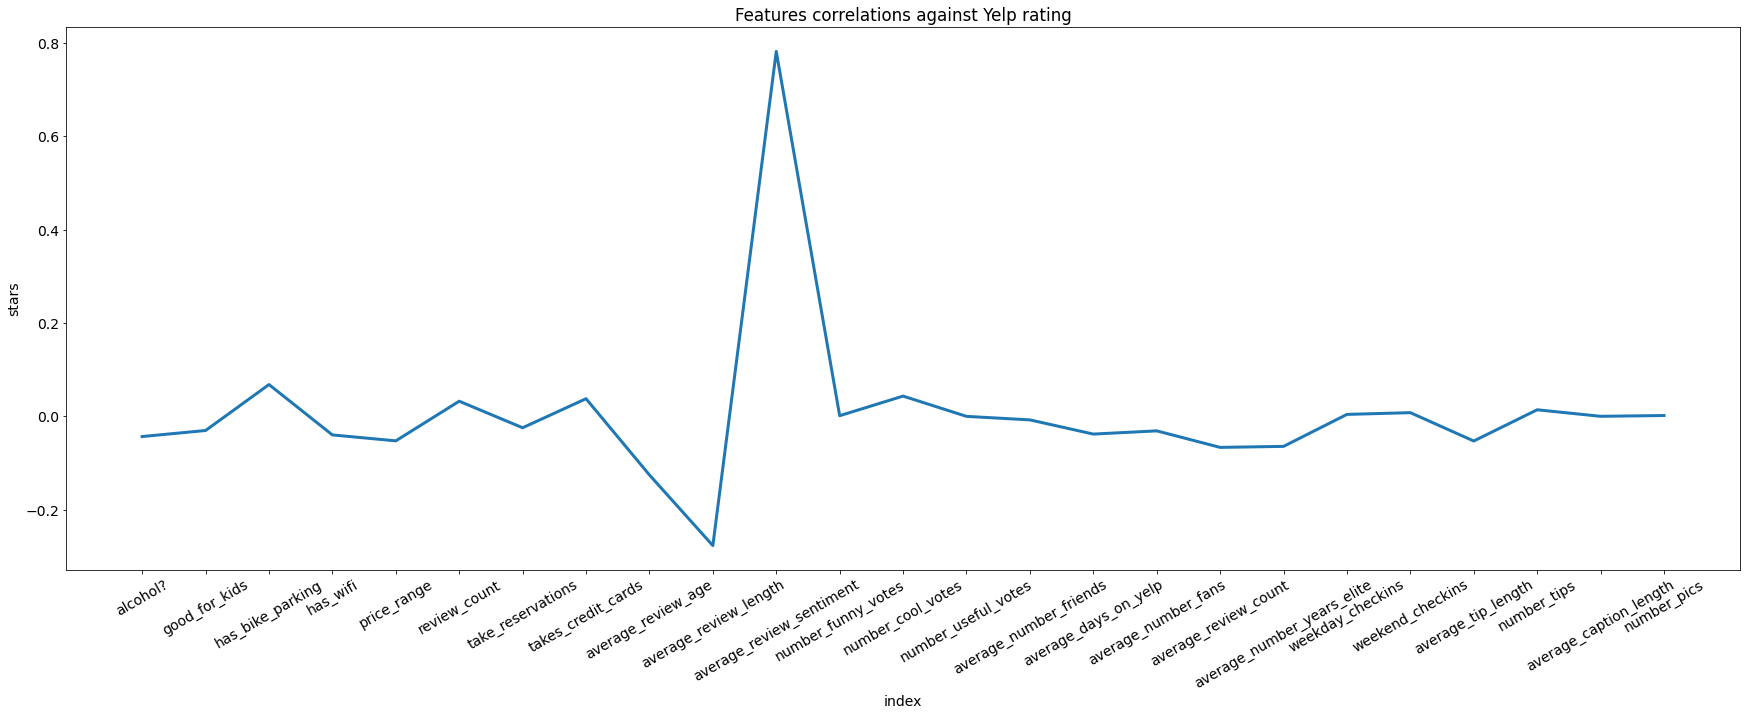

In [27]:
fig, ax = plt.subplots(figsize = (30, 10))
ax = sns.lineplot(data = cor_stars, x='index', y='stars')
ax.set_title("Features correlations against Yelp rating")
ax.set_xticklabels(cor_stars['index'], rotation=30)
plt.show()

In [28]:
print(f"Max: {cor_stars.max()}")
print(f"Min: {cor_stars.min()}")
print(f"Avarage: {cor_stars.mean()}")

Max: index    weekend_checkins
stars            0.782187
dtype: object
Min: index    alcohol?
stars   -0.277081
dtype: object
Avarage: stars    0.005552
dtype: float64


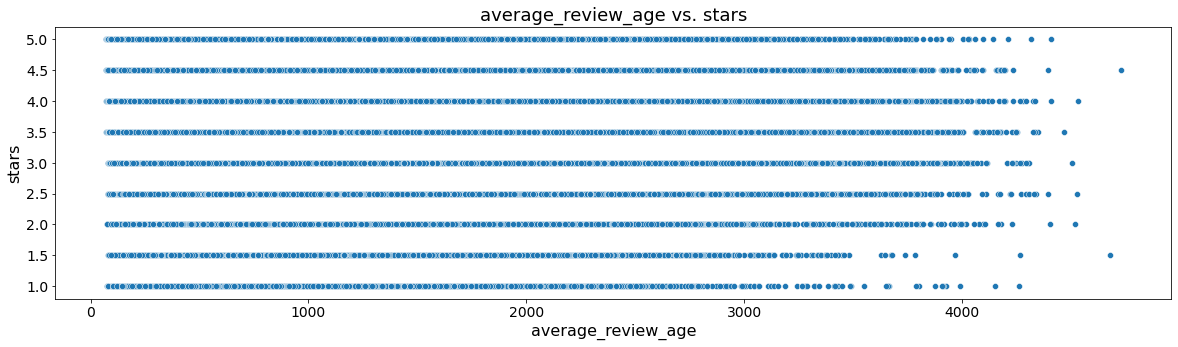

In [29]:
def col_vs_col(dataframe, col1, col2='stars'):
    fig, ax = plt.subplots(figsize=(20,5))
    ax = sns.scatterplot(x=col1, y=col2, data=dataframe)
    sns.color_palette('husl',8)
    ax.set_xlabel(col1, fontsize=16)
    ax.set_ylabel(col2, fontsize=16)
    ax.set_title(f"{col1} vs. {col2}", fontsize=18)
    return plt.show()
col_vs_col(df, 'average_review_age')

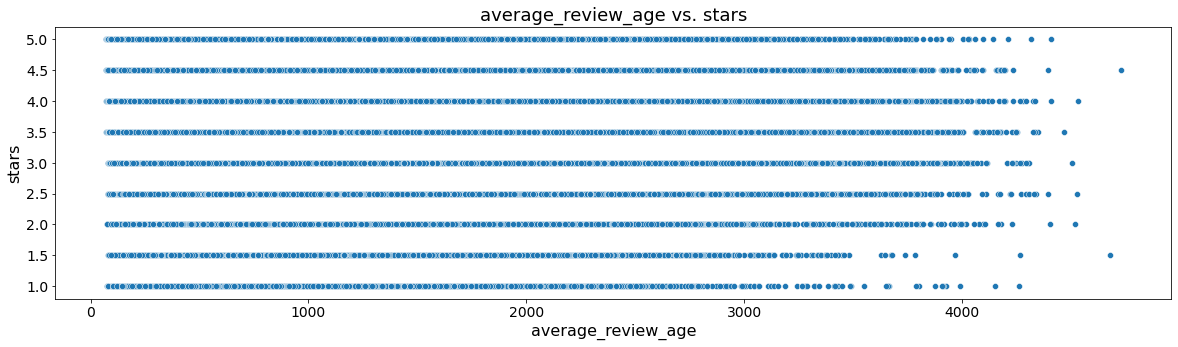

In [30]:
col_vs_col(df, 'average_review_age')

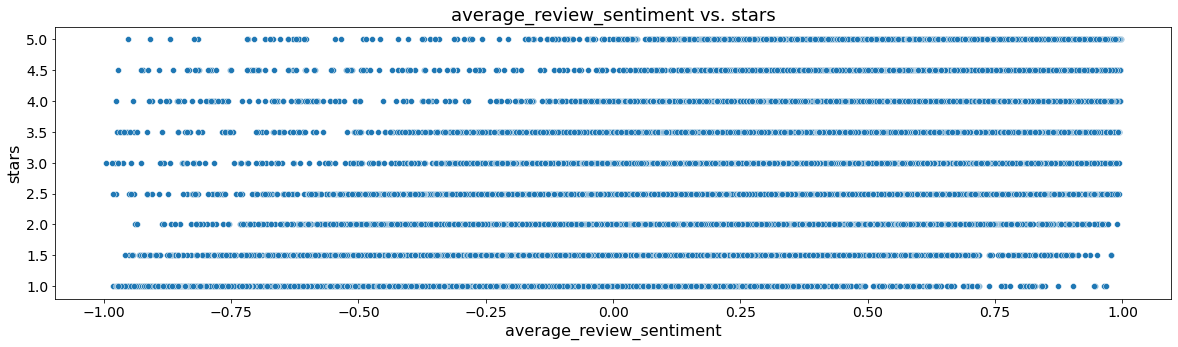

In [31]:
col_vs_col(df, 'average_review_sentiment')

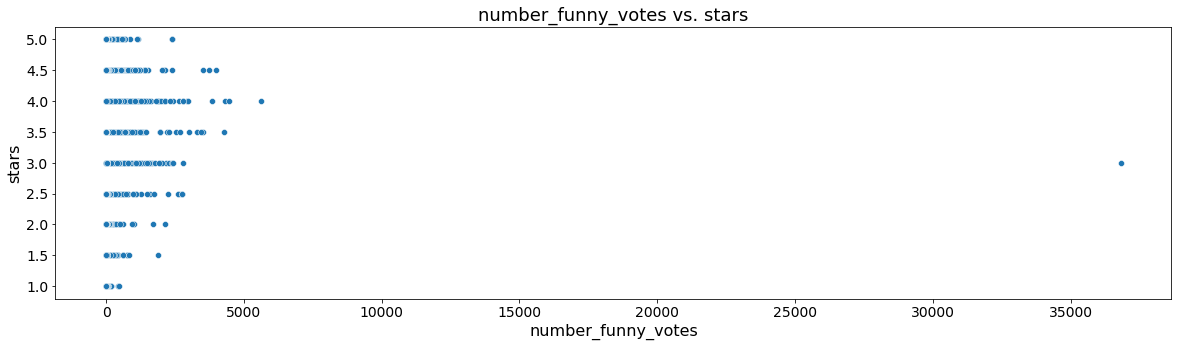

In [32]:
col_vs_col(df, 'number_funny_votes')

## Data selection

#### imports sklearn

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
features = df[['average_review_length', 'average_review_age']]
ratings = df[['stars']]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

## Create model and train

In [37]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Evaluate and Understand the Model

In [38]:
model.score(x_train, y_train)

0.08250309566544889

In [39]:
model.score(x_test, y_test)

0.08083081210060561

In [40]:
y_predicted = model.predict(x_test)

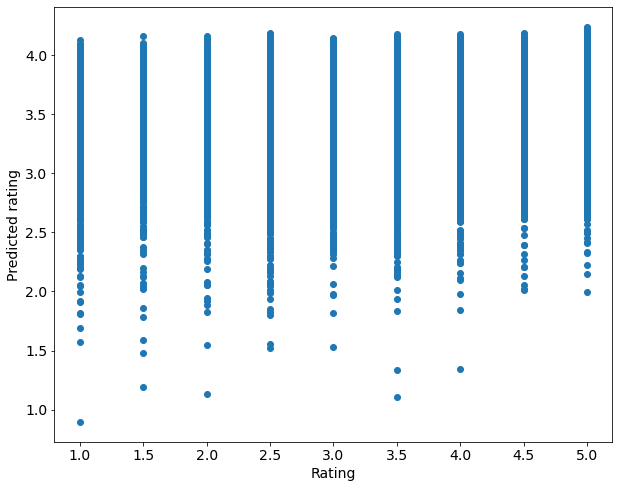

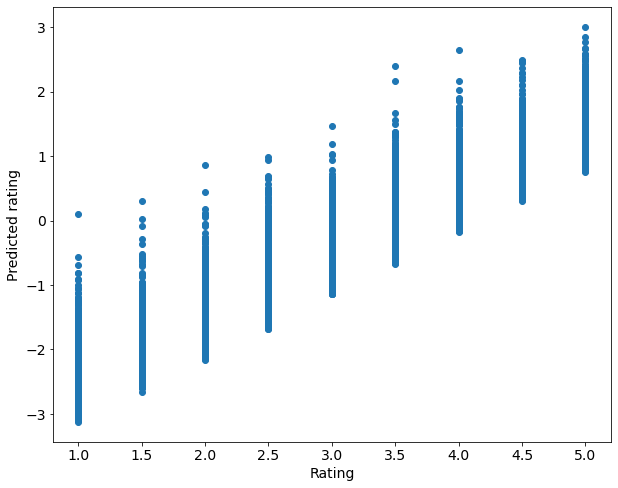

In [41]:
def scatter_plot(x,y):
    plt.figure(figsize=(10,8))
    plt.scatter(x,y)
    plt.xlabel("Rating")
    plt.ylabel("Predicted rating")
    plt.show()

scatter_plot(y_test, y_predicted)
scatter_plot(y_test, y_test - y_predicted)


In [42]:
def model(feature, rating, dataset):
    features = pd.DataFrame()
    for feat in feature:
        features[feat] = dataset[feat]

    ratings = dataset.loc[:, rating]
    try:
        x_train, x_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    except:
         x_train, x_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1, shuffle=None, stratify=None)
    if len(x_train.shape) <  2:
        x_train = np.array(x_train).reshape(-1,1)
        x_test = np.array(x_test).reshape(-1,1)
    model = LinearRegression()
    model.fit(x_train,y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f"Result for {feature}")
    print(f"Model score  is {train_score}")
    print(f"Model score  is {test_score}")
    print(model.coef_)
    print(sorted(list(zip(feature,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    y_predicted = model.predict(x_test)
    
    return scatter_plot(y_test, y_predicted), scatter_plot(y_test, y_test - y_predicted)
    


Result for ['average_review_length', 'average_review_age', 'average_review_sentiment']
Model score  is 0.6520510292564032
Model score  is 0.6495675480094876
[[-5.97830018e-04 -1.52099368e-04  2.24303031e+00]]
[('average_review_length', array([-5.97830018e-04, -1.52099368e-04,  2.24303031e+00]))]


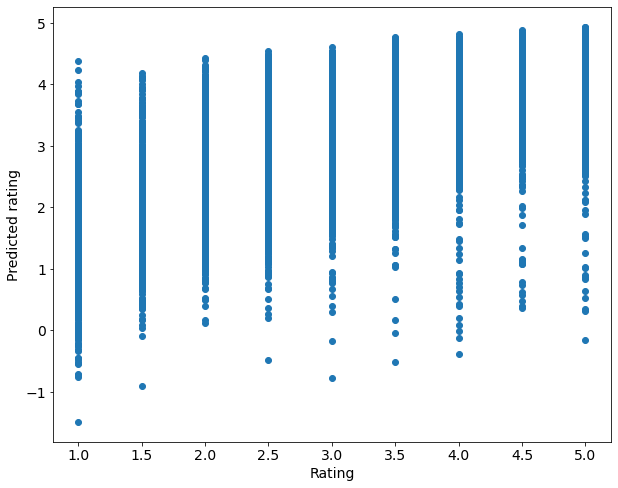

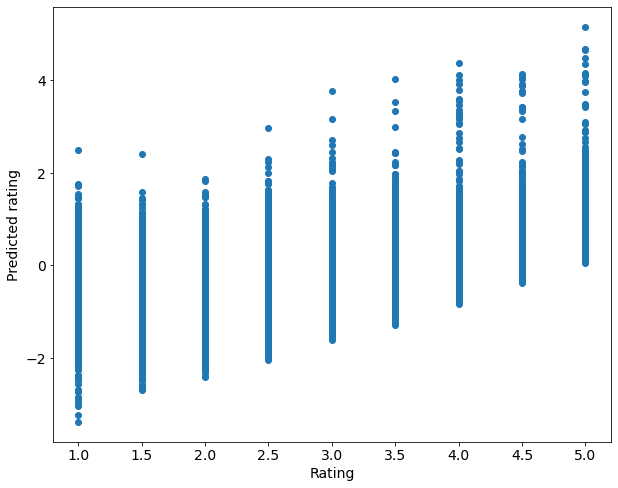

(None, None)

In [43]:
features_1 = ['average_review_length', 'average_review_age', 'average_review_sentiment']
rating = ['stars']
model(features_1, rating, df)

Result for ['average_review_sentiment']
Model score  is 0.6118980950438655
Model score  is 0.6114021046919491
[[2.30339084]]
[('average_review_sentiment', array([2.30339084]))]


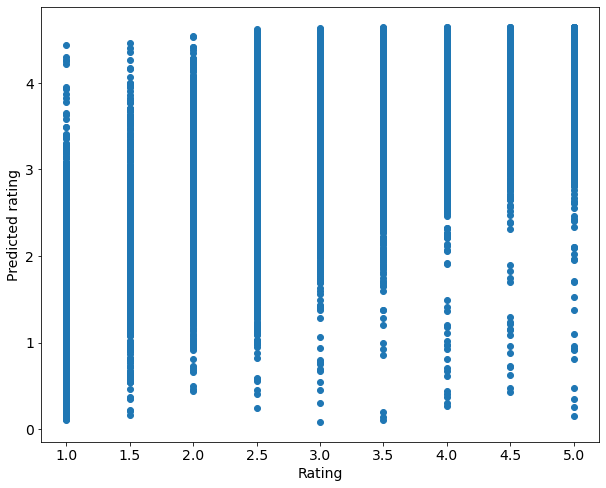

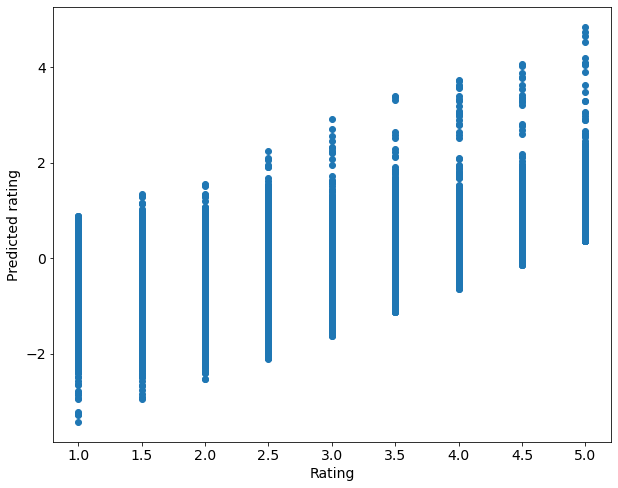

(None, None)

In [44]:
features_2 = ['average_review_sentiment']
rating = ['stars']
model(features_2, rating, df)

Result for ['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi']
Model score  is 0.012223180709591386
Model score  is 0.010119542202269072
[[-0.14549671  0.19003008  0.07175536 -0.08632486  0.04526559 -0.13187398]]
[('alcohol?', array([-0.14549671,  0.19003008,  0.07175536, -0.08632486,  0.04526559,
       -0.13187398]))]


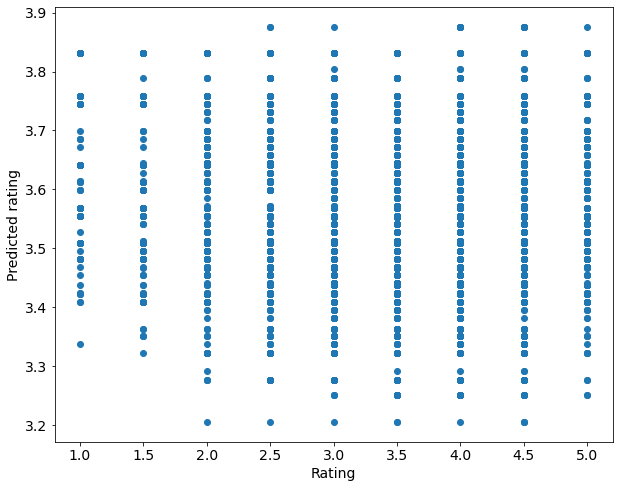

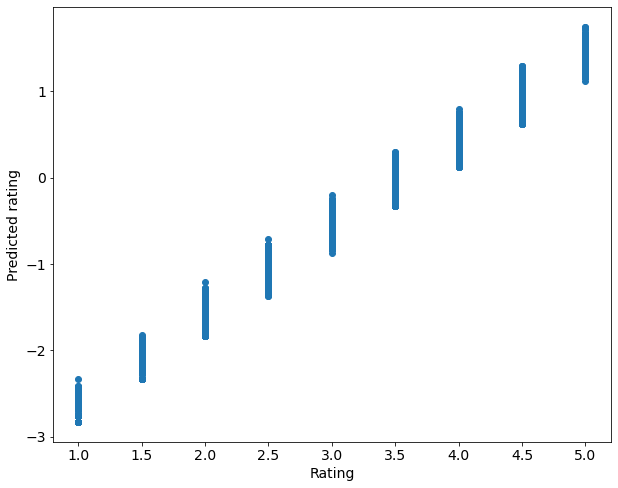

(None, None)

In [45]:
features_3 = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']
model(features_3, rating, df)

Result for ['review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']
Model score  is 0.6734992593766659
Model score  is 0.6713318798120158
[[-3.48348376e-05 -8.04608096e-02 -3.34706601e-03 -2.95650281e-03
  -1.69306082e-04 -5.81365569e-04  2.27210766e+00 -7.88439567e-06
   1.14688392e-03 -2.32037848e-04 -5.32203206e-04 -1.59530508e-03
   4.82699211e-05  1.28780259e-04  1.05106021e-03 -2.24317029e-04
  -7.19036629e-02  5.91858075e-05 -5.51817621e-05]]
[('review_count', array([-3.48348376e-05, -8.04608096e-02, -3.34706601e-03, -2.95650281e-03,
       -1.69306082e-04, -5.81365569e-04,  2.27210766e+00, -7.88439567e-06,
        1.1468839

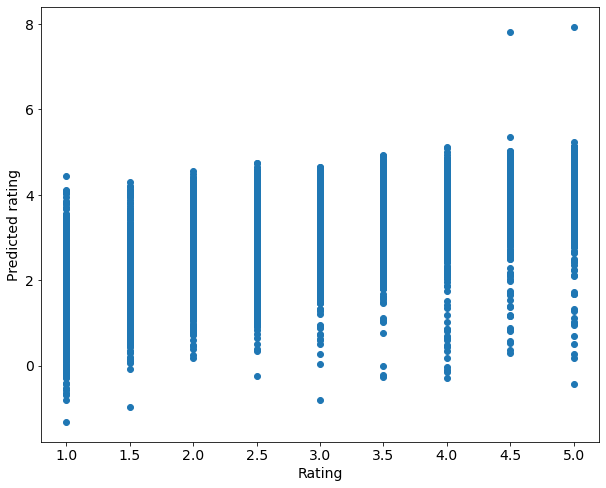

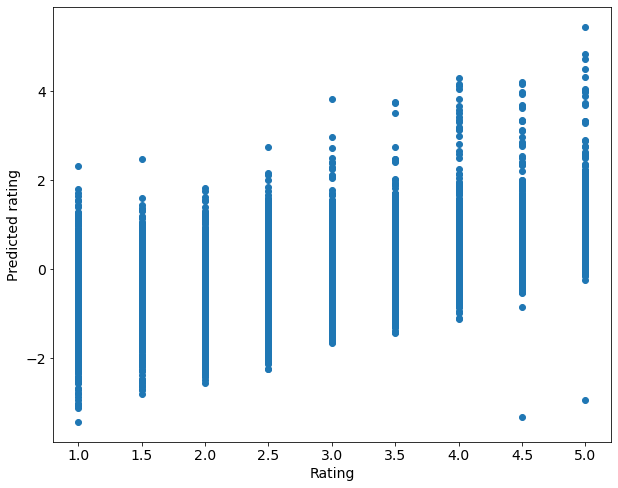

(None, None)

In [46]:
features_4 = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']
model(features_4, rating, df)

Result for ['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi', 'review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']
Model score  is 0.6807828861895334
Model score  is 0.6782129045869248
[[-1.49914986e-01  2.72969699e-02  2.44518379e-02 -1.18078144e-01
   1.41345592e-02 -1.21553826e-01  1.01122594e-04 -6.48673015e-02
  -6.47274980e-04 -1.31336123e-03 -1.57765441e-04 -5.89625792e-04
   2.28084570e+00  4.84793510e-05  9.72372273e-04 -2.71506413e-04
  -4.20521750e-04 -8.54656332e-04  2.06958404e-05  1.23261477e-04
   1.02679868e-03 -2.33983569e-04 -6.27893971e-02  6.15390912e-05
 

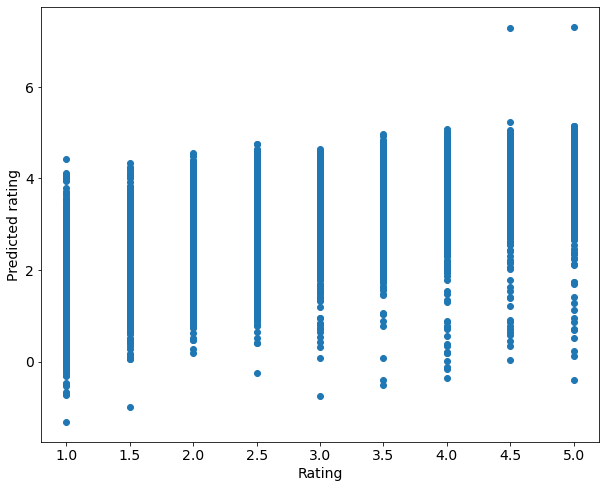

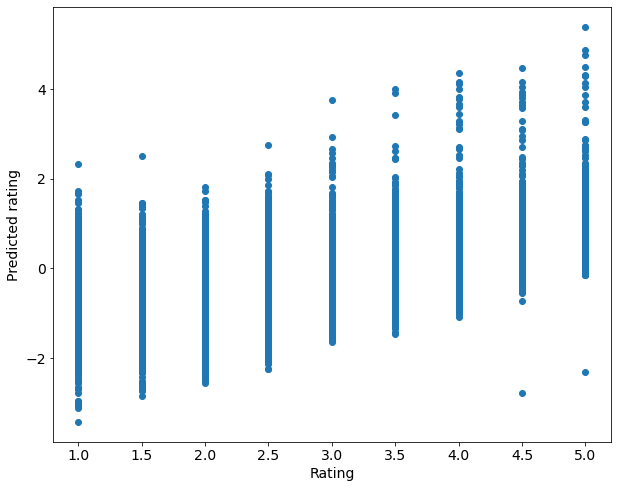

(None, None)

In [47]:
features_5 = features_3 + features_4
model(features_5, rating, df)

In [48]:
test3 = np.array([
    1,                  # alcohol
    1,                  # has_bike_parking
    1,                  # takes_credit_cards
    1,                  # good_for_kids
    1,                  # take_reservations
    1,                  # has_wifi
    25,                 # review_count
    3,                  # price_range
    28.31829,           # average_caption_length
    15,                 # number_pics
    2175.501021,        # average_review_age
    440.463567,         # average_review_length
    0.45,               # average_review_sentiment
    5.617091,           # number_funny_votes
    28.495973,          # number_cool_votes
    40.515279,          # number_useful_votes
    25.643426,          # average_tip_length
    9.285217,           # number_tips
    155.132000,         # average_number_friends
    505.367009,         # average_days_on_yelp
    19.590148,          # average_number_fans
    92.110660,          # average_review_count
    6.923313,           # average_number_years_elite
    145.385094,         # weekday_checkins
    549.612515          # weekend_checkins
]).reshape(1,-1)

In [49]:
def model_2(feature, rating, dataset, test3):
    features = pd.DataFrame()
    for feat in feature:
        features[feat] = dataset[feat]

    ratings = dataset.loc[:, rating]
    try:
        x_train, x_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    except:
         x_train, x_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1, shuffle=None, stratify=None)
    if len(x_train.shape) <  2:
        x_train = np.array(x_train).reshape(-1,1)
        x_test = np.array(x_test).reshape(-1,1)
    model = LinearRegression()
    model.fit(x_train,y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f"Result for {feature}")
    print(f"Model score  is {train_score}")
    print(f"Model score  is {test_score}")
    print(model.coef_)
    print(sorted(list(zip(feature,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    y_predicted = model.predict(x_test)
    print()
    y_predicted_2 = model.predict(test3)
    print('prediction for test')
    print(y_predicted_2)
    
    return scatter_plot(y_test, y_predicted)

Result for ['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi', 'review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']
Model score  is 0.6807828861895334
Model score  is 0.6782129045869248
[[-1.49914986e-01  2.72969699e-02  2.44518379e-02 -1.18078144e-01
   1.41345592e-02 -1.21553826e-01  1.01122594e-04 -6.48673015e-02
  -6.47274980e-04 -1.31336123e-03 -1.57765441e-04 -5.89625792e-04
   2.28084570e+00  4.84793510e-05  9.72372273e-04 -2.71506413e-04
  -4.20521750e-04 -8.54656332e-04  2.06958404e-05  1.23261477e-04
   1.02679868e-03 -2.33983569e-04 -6.27893971e-02  6.15390912e-05
 

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


prediction for test
[[2.31128725]]


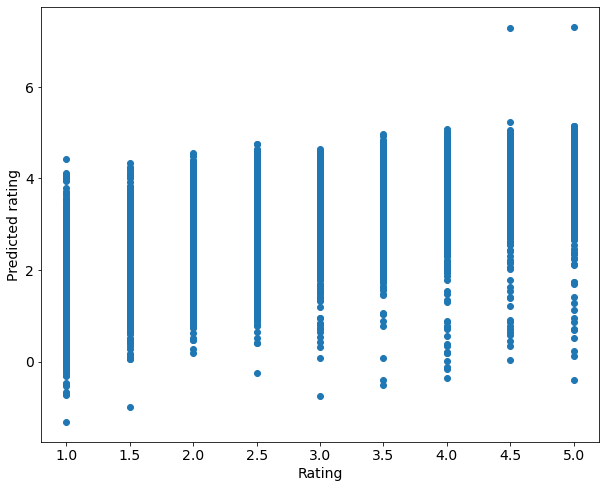

In [50]:
features_5 = features_3 + features_4
model_2(features_5, rating, df, test3)